In [1]:
import itertools
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure
import glob
from datetime import datetime
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from IPython.display import display, Markdown

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def read_file_to_df(path):
    all_files = glob.glob(path + '/*.csv')
    df = pd.DataFrame()
    for filename in all_files:
        temp = pd.read_csv(filename)
        df = pd.concat([df, temp])
    return df

In [3]:
def fix_data(data, name_of_pump):
    data = data[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
    data = data.rename(columns = {'hstWaarde' : '{}'.format(name_of_pump)})
    data['datetime'] = pd.to_datetime(data['datumBeginMeting'], format = '%Y-%m-%d %H:%M:%S')
    data['datumBeginMeting'] = pd.to_datetime(data['datumBeginMeting'], format='%Y-%m-%d %H:%M:%S')
    data['datumEindeMeting'] = pd.to_datetime(data['datumEindeMeting'], format='%Y-%m-%d %H:%M:%S')
    data = data.set_index('datumBeginMeting')
    data = data.sort_index() # Datetime index
    return data

In [4]:
def first_non_zero(data, name):
    s = pd.Series(data[name])
    f = pd.DataFrame(s.iloc[s.nonzero()[0]]).reset_index()

    m_index = f['datumBeginMeting'][0]
    print(m_index)
    data3 = data.loc[m_index:,:]
    data3[name].plot()
    return data3

In [5]:
def dry_df(df):
    df = pd.read_csv(df, sep="\n", header=None)
    df.columns = ["a"]
    df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
    df = df[['datetime']]
    return df

In [6]:
def whole_df(df):
    df = pd.read_csv('./data/den bosch/whole map/' + df + '.csv', sep="," or "\n")
    df = df.iloc[:,1:3].rename(columns = {'Begin':'Datetime', df.columns[2]:'Rain'})
    
    df = df.set_index(pd.to_datetime(df['Datetime'], format = '%Y-%m-%d %H:%M:%S'))
    df['Rain'] = df['Rain'] * 10000
    df = df.groupby(pd.TimeGrouper('H'))['Rain'].sum()

#     df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
#     df = df.set_index(df['datetime'])
    return df

In [7]:
def filterDryDays(data, dry, name_of_pump):
    data = pd.DataFrame(data)
    dry = np.where(data.index.isin(dry['datetime']), 1, 0)
    data['dry'] = dry
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

In [8]:
def joinOnRain(data, whole, name_of_pump):
    whole = pd.DataFrame(whole)
    data = pd.DataFrame(data)
    rain = np.where(whole.index.isin(data.index), 1, 0)
    data = data[data['dry'] == 1]
    #data['interaction'] = data[name_of_pump] * data['dry']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()
    return data

In [9]:
def create_dummies(data, y):
    data['1'] = np.where(data.index.hour == 0, 1, 0)
    data['2'] = np.where(data.index.hour == 1, 1, 0)
    data['3'] = np.where(data.index.hour == 2, 1, 0)
    data['4'] = np.where(data.index.hour == 3, 1, 0)
    data['5'] = np.where(data.index.hour == 4, 1, 0)
    data['6'] = np.where(data.index.hour == 5, 1, 0)
    data['7'] = np.where(data.index.hour == 6, 1, 0)
    data['8'] = np.where(data.index.hour == 7, 1, 0)
    data['9'] = np.where(data.index.hour == 8, 1, 0)
    data['10'] = np.where(data.index.hour == 9, 1, 0)
    data['11'] = np.where(data.index.hour == 10, 1, 0)
    data['12'] = np.where(data.index.hour == 11, 1, 0)
    data['13'] = np.where(data.index.hour == 12, 1, 0)
    data['14'] = np.where(data.index.hour == 13, 1, 0)
    data['15'] = np.where(data.index.hour == 14, 1, 0)
    data['16'] = np.where(data.index.hour == 15, 1, 0)
    data['17'] = np.where(data.index.hour == 16, 1, 0)
    data['18'] = np.where(data.index.hour == 17, 1, 0)
    data['19'] = np.where(data.index.hour == 18, 1, 0)
    data['20'] = np.where(data.index.hour == 19, 1, 0)
    data['21'] = np.where(data.index.hour == 20, 1, 0)
    data['22'] = np.where(data.index.hour == 21, 1, 0)
    data['23'] = np.where(data.index.hour == 22, 1, 0)
    
    data['monday'] = np.where(data.index.day == 0, 1, 0)
    data['tuesday'] = np.where(data.index.day == 1, 1, 0)
    data['wednesday'] = np.where(data.index.day == 2, 1, 0)
    data['thursday'] = np.where(data.index.day == 3, 1, 0)
    data['friday'] = np.where(data.index.day == 4, 1, 0)
    data['saturday'] = np.where(data.index.day == 5, 1, 0)
    
    data['january'] = np.where(data.index.month == 1, 1, 0)
    data['february'] = np.where(data.index.month == 2, 1, 0)
    data['march'] = np.where(data.index.month == 3, 1, 0)
    data['april'] = np.where(data.index.month == 4, 1, 0)
    data['may'] = np.where(data.index.month == 5, 1, 0)
    data['june'] = np.where(data.index.month == 6, 1, 0)
    data['july'] = np.where(data.index.month == 7, 1, 0)
    data['august'] = np.where(data.index.month == 8, 1, 0)
    data['september'] = np.where(data.index.month == 9, 1, 0)
    data['october'] = np.where(data.index.month == 10, 1, 0)
    data['november'] = np.where(data.index.month == 11, 1, 0)
    
#     data['1hour'] = data[y].shift(-1)
#     data['2hours'] = data[y].shift(-2)
#     data['3hours'] = data[y].shift(-3)
    
    return data

In [10]:
def RF_model(data, name):
    X = (data.drop([name], axis = 1))
    y = (data[name])
    
    X_train = X.iloc[:round(0.8*len(X)),:]
    y_train = y.iloc[:round(0.8*len(y))]            
    
    X_test = X.iloc[round(0.8*len(X)):,:]  
    y_test = y.iloc[round(0.8*len(y)):]
    
    RF_Model = RandomForestRegressor(n_estimators=200, max_features=34, oob_score=True)
    
    labels = y_train#[:, None]
    features = X_train

    rgr=RF_Model.fit(features, labels)
    
    X_test_predict2 = rgr.predict(X_test)
    validation = pd.DataFrame(X_test_predict2, y_test).reset_index().rename(columns = {name:'Real flow', 0:'Prediction Flow'})

    validation = validation.set_index(X_test.index)
    
    return validation

In [11]:
def interpolate(data, name):
    a = data[data['dry'] == 1]
    b = data[data['dry'] == 0]
    b[name] = np.NAN
    data = a.append(b).sort_index()
    data2 = data[name].interpolate(method = 'time')
    data2 =  pd.DataFrame(data2)
    return data2

In [12]:
def only_changed_rows(df, give_index=False, silent=False):
    changed_elements_index = df.shift() != df
    
    if not silent: # Print amount of changed rows message:
        total = df.shape[0]
        remaining = changed_elements_index.any(axis=1).sum()
        display(Markdown(f"Of **{total:,}** rows, **{total-remaining:,} ({(total-remaining)/total:.2%})**\
        were found to be consecutive duplicates. \n**{remaining:,}** rows remaining."))
    
    return changed_elements_index if give_index else df.loc[changed_elements_index.any(axis=1)]

In [13]:
def timeGrouper(data, name):
    return data.groupby(pd.TimeGrouper('H'))[name].mean()

In [14]:
def complete_preprocess_for_model(path, name, dry_filename, whole_df_name):
    data = read_file_to_df(path)
    data = fix_data(data, name)
    data = only_changed_rows(data)
    data = first_non_zero(data, name)
    data = timeGrouper(data, name)
    dry = dry_df(dry_filename)
    whole = whole_df(whole_df_name)
    data = filterDryDays(data, dry, name)
    data = interpolate(data, name)
    data = create_dummies(data, name)
    data2 = RF_model(data, name)
    return data ,data2, dry, whole


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Of **829,320** rows, **20 (0.00%)**        were found to be consecutive duplicates. 
**829,300** rows remaining.

2018-04-19 10:40:00


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


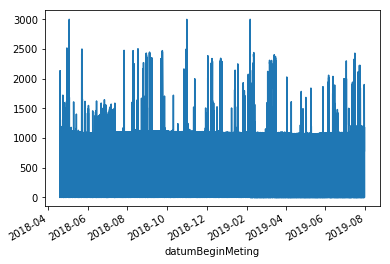

In [15]:
original, de_rompert, dry_rompert, whole_rompert = complete_preprocess_for_model('./data/den bosch/sewer_data_db/flow/de Rompert/', 'de_rompert', 'dry_rompert', 'whole_rompert')

In [24]:
def match_data2(original, predicted):
    original = original[predicted.index.min(): predicted.index.max()]
    matched = original.join(predicted, how = 'outer')
    
    matched = matched[['de_rompert', 'Prediction Flow', 'Real flow']]
    matched['Real flow'] = matched['de_rompert']
    matched['Prediction Flow'] = matched['Prediction Flow'].fillna(matched['de_rompert'])
    
    
    
    constant_flow = pd.DataFrame()
    matched['constant_prediction'] = 0
    last_diff = 0
    for i, j in matched.groupby(pd.TimeGrouper("d")):
        j['constant_prediction'] = j['Prediction Flow'].mean()
        try:
            if last_diff < 500:
                j['constant_prediction'] = j['Prediction Flow'].mean() * 0
                
            if last_diff > 10000:
                j['constant_prediction'] = j['Prediction Flow'].mean() * 1.5

            if last_diff > 20000:
                j['constant_prediction'] = j['Prediction Flow'].mean() * 2

        except:
            continue
 
        constant_flow = pd.concat([constant_flow, j], axis=0)
        constant_flow['total_rompert'] = constant_flow['de_rompert'].cumsum()
        constant_flow['total_model'] = constant_flow['constant_prediction'].cumsum()
        last_diff = constant_flow.iloc[-1]['total_rompert'] - constant_flow.iloc[-1]["total_model"]
        constant_flow['difference'] = constant_flow['total_rompert'] - constant_flow['total_model']

    return constant_flow

matched = match_data2(original, de_rompert)
matched.head(15)


C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Prediction Flow,Real flow,constant_prediction,de_rompert,difference,total_model,total_rompert
datumBeginMeting,,,,,,,
2019-05-02 19:00:00,369.634799,492.721667,0.000000,492.721667,492.721667,0.000000,492.721667
2019-05-02 20:00:00,398.646986,421.950000,0.000000,421.950000,914.671667,0.000000,914.671667
2019-05-02 21:00:00,392.318568,407.083333,0.000000,407.083333,1321.755000,0.000000,1321.755000
2019-05-02 22:00:00,397.224032,317.783333,0.000000,317.783333,1639.538333,0.000000,1639.538333
2019-05-02 23:00:00,374.080693,364.985000,0.000000,364.985000,2004.523333,0.000000,2004.523333
2019-05-03 17:00:00,1103.489033,250.903333,567.566789,250.903333,1687.859878,567.566789,2255.426667
2019-05-03 18:00:00,685.713957,293.246667,567.566789,293.246667,1413.539755,1135.133578,2548.673333
2019-05-03 19:00:00,370.593558,355.105000,567.566789,355.105000,1201.077966,1702.700367,2903.778333
2019-05-03 20:00:00,452.394018,328.631667,567.566789,328.631667,962.142844,2270.267156,3232.410000


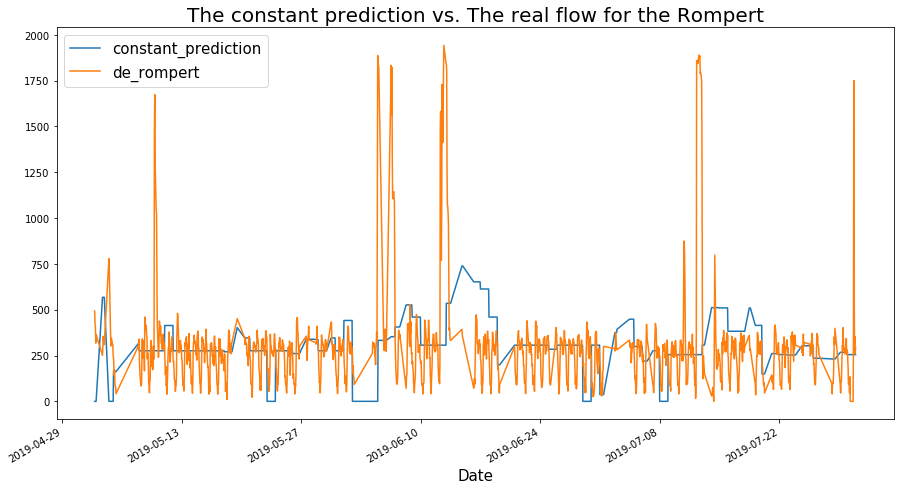

In [25]:
ax = matched[['constant_prediction', 'de_rompert']].plot(figsize=(15,8))
ax.set_title('The constant prediction vs. The real flow ' + 'for the Rompert', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})


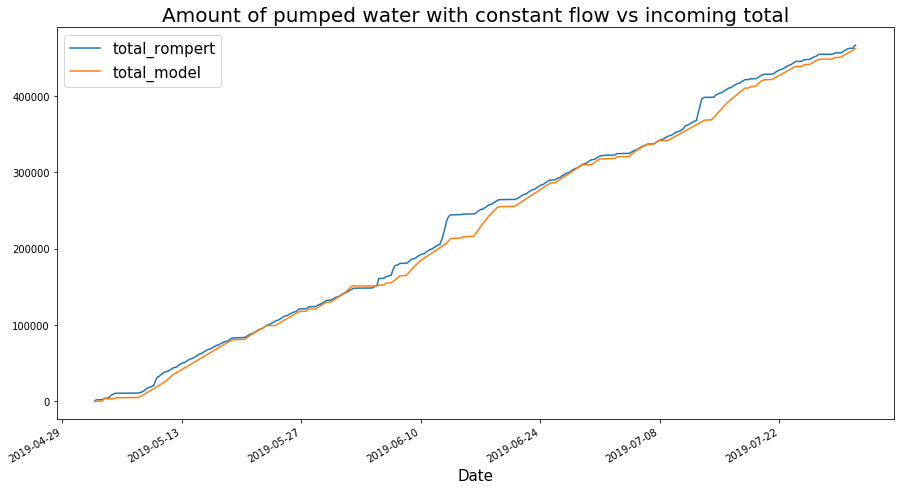

In [26]:
ax = matched[['total_rompert', 'total_model']].plot(figsize=(15,8))
ax.set_title('Amount of pumped water with constant flow vs incoming total', size = 20)
ax.set_xlabel('Date', size = 15)
ax.legend(prop={'size': 15})


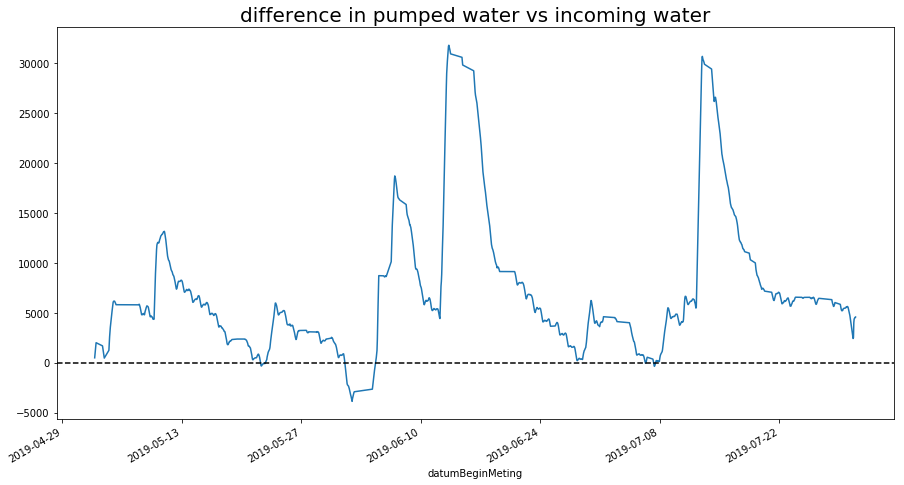

In [27]:
ax = matched.difference.plot(figsize = (15,8))
ax.set_title('difference in pumped water vs incoming water', size = 20)
ax.axhline(y= 0, c = 'black', linestyle = '--')